### (0 баллов) Считываем данные

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff


import matplotlib.pyplot as plt
import os

In [24]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [25]:
#dataset

In [26]:
X = dataset['data']
#X[:10]

In [27]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [28]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [29]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sklearn_model = LinearRegression().fit(X_train, y_train)
y_pred = sklearn_model.predict(X_test)

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [32]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return sum((np.array(y_real)-np.array(y_pred))**2)/len(y_real)

In [33]:
sklearn_mse = mean_squared_error(y_test, y_pred)
sklearn_mse1 = MSE(y_test, y_pred)

sklearn_mse1

17.891319010827466

Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [34]:
MSE(y_test, y_pred.mean())

61.660542679495144

Наивный алгоритм по точности предсказаний в 3,5 раз наименее точен, нежели регрессия

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [44]:
from sklearn.linear_model import Ridge

lambdas = np.arange(0.1, 250.0, 10)
lambda_errors = [] #хранилище mse
alphas = [] #хранилище параметра регуляризации

for val in lambdas:
    model = Ridge(alpha=val).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    lambda_errors.append(mean_squared_error(y_test, y_pred))
    alphas.append(val)

lambda_errors

[17.721781882812678,
 16.192852984444347,
 15.920626062117472,
 15.752418685263242,
 15.644788860220856,
 15.577159953980127,
 15.537113364485881,
 15.516511032338181,
 15.509788569697399,
 15.513037968306332,
 15.523462133171734,
 15.539030466940318,
 15.558252562616047,
 15.580025150164456,
 15.60352625183597,
 15.628140650950346,
 15.653406610168318,
 15.67897728324269,
 15.704592450130875,
 15.730057606014505,
 15.755228353093186,
 15.779998657871928,
 15.804291953899554,
 15.828054357712615,
 15.851249466868186]

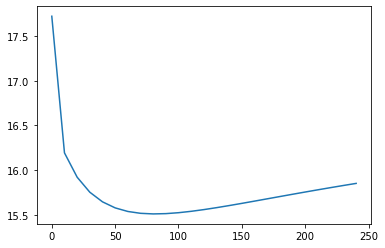

In [38]:
plt.plot(alphas, lambda_errors)

Не ну мы упрямые. мы попробуем Лассо еще долбануть

In [39]:
from sklearn.linear_model import Lasso

lambdas = np.arange(0.1, 250.0, 10)
lambda_errors = [] #хранилище mse
alphas = [] #хранилище параметра регуляризации

for val in lambdas:
    model = Lasso(alpha=val).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    lambda_errors.append(mean_squared_error(y_test, y_pred))
    alphas.append(val)
    
lambda_errors

[16.038376348001115,
 20.50136315470709,
 26.85103681817619,
 38.60831719136017,
 41.97406506843991,
 43.29339831928603,
 43.63320337011909,
 43.995687354986366,
 44.380918660297155,
 44.7887386958638,
 45.21924407884329,
 45.67243523163822,
 46.148340925342374,
 46.490035024288034,
 46.5606137568599,
 46.63725131881143,
 46.719947710142634,
 46.80870293085351,
 46.9035169809441,
 47.004389860414335,
 47.11132156926428,
 47.22431210749388,
 47.34336147510318,
 47.46846967209215,
 47.599636698460785]

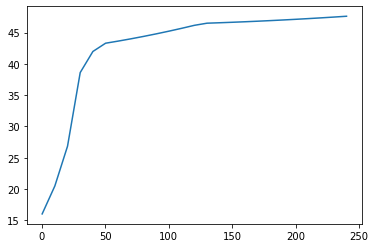

In [40]:
plt.plot(alphas, lambda_errors)

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

Регуляризация (Ridge, но не Lasso) в данном случае помогает - не сильно, но помогает
Рассмотрим оба варианта регрессии в сравнении с регрессией без регуляризации подробнее.

1. Ridge
Лучшее alpha для использования - 80.1, ошибка при этом равна 15.50 против 17.89 в обычной регрессии

2. Lasso
Тут вообще дичь - минимальная ошибка 16.03, что уже больше минимальной ошибки при Ridge регрессии - однако при повышении кф регуляризации начиается творитьс дичь

Вывод: лучше справляется Ridge регресися, но ввиду не сильно большой разницы можно использовать и оычную регрессию без регуляризации